## matrix inverse method 회귀분석

데이터가 다음과 같이 주어졌을 때:

* x: [1,2],[1,4],[1,6]

* y: 3,6,7



회귀식을 도출해보자.

### 문제 1) matrix inverse method로 계수를 계산하고 출력

#### 데이터 생성

In [1]:
import numpy as np

x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])

In [2]:
print("x:\n", x1)

x:
 [[1 2]
 [1 4]
 [1 6]]


In [3]:
print("y:", y1)

y: [3 6 7]


#### w 계산

In [4]:
# 한 줄로 계산
w0, w1=np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1)) #1.3 1.0

In [5]:
f"w0:{w0} w1:{w1}"

'w0:1.3333333333333357 w1:1.0'

In [6]:
# numpy listsq
w0, w1=np.linalg.lstsq(x1, y1, rcond=None)[0]
print(w0,w1)

1.3333333333333308 1.0000000000000004


### 문제 2) 예측과 실제의 오류 합계를 계산하고 출력

In [7]:
x=x1[:,1]  #[2, 4, 6]

In [8]:
yhat=w0+w1*x

In [9]:
# 예측
f"predicted yhat: {yhat}"

'predicted yhat: [3.33333333 5.33333333 7.33333333]'

In [10]:
# 실제값과 예측값의 오류
f"predicted - actual: {yhat-y1}"

'predicted - actual: [ 0.33333333 -0.66666667  0.33333333]'

#### 오류 계산(예측과 실제의 오류 합계 SSE)

In [11]:
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2))))

SSE sum of squared errors: 0.6666666666666675


In [12]:
print ("i\t오류\ty\t예측")
print ("--\t-----\t-----\t-----")
for i in range(len(x1)):
    predicted=w0*x1[i][0] + w1*x1[i][1]
    error=y1[i]-predicted
    print("{0:2d}\t{1:.2f} =\t {2}  -\t{3:.2f}".format(i,error,y1[i],predicted))

i	오류	y	예측
--	-----	-----	-----
 0	-0.33 =	 3  -	3.33
 1	0.67 =	 6  -	5.33
 2	-0.33 =	 7  -	7.33


### 문제 3) 입력 데이터와 회귀선의 그래프를 작성

#### 회귀선을 numpy 최소자승법으로 구하고, 실제 데이터와 같이 그래프를 그리기

predicted yhat: [3.33333333 5.33333333 7.33333333]
SSE sum of squared errors: 0.6666666666666667


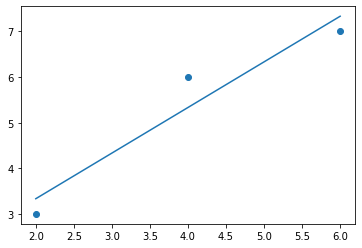

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# (1) data ready
x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])
#_x=np.array([x,np.ones(len(x))]) # shape (2,4)
# (2) shape is right already (column:x0,x1 row:records)
# (3) compute w (w0 for x0, w1 for x1)
#w0,w1=np.linalg.lstsq(x1, y1, rcond=None)[0]
w0, w1=np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1)) #1.3 1.0
# (4) predicted
x=x1[:,1]  #[2, 4, 6]
yhat=w0+w1*x
print("predicted yhat: {}".format(yhat))
# (5) error
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2))))
# (6) graph
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y1)
ax.plot(x,yhat)